# NFL Fantasy Football Project

It's Monday night, I have just gotten off of a long day at work, and the anxiety has been building all day. I pick up my phone and open up the ESPN fantasy football app (where I have hosted my fantasy football league, affectionately dubbed "The League" as an homage to one of our favorite football themed sitcoms, for over ten years) and I click on my matchup. I'm down 15 points and I have one wide receiver left who is playing in the Monday night game. Can he get the 15 points I need to secure the win this week? Or will all my anticipation lead to dissapointment as I head to sleep and into the waiver wire section of the week? If you're a fantasy football fan, you know that this question almost always leads to dissapointment (although from a statistical standpoint that is liekly not true).

This is the situation I have found myself in many times over the years. As a fantasy football fanatic, I cannot get enough of the highs (and lows) the game has to offer. However, wouldn't those highs and lows be a bit higher if I could know with more certainty how my team would perform? What if I could improve upon the already fairly robust fantasy projection systems most major fantasy apps have? This is the quest of this project!

The goal is to create an app/dashboard with all the information I need to dominate my league. Projections, historical data, vizualizations, and potential sleepers will all be located in one, easy to use interface. If I'm feeling generous I may even share this useful tool with my league-mates!

## This Notebook - EDA and Feature Engineering
The point of this notebook is to introduce the data I'll be using for this project. I want to explore the data, visualize it, clean it, and engineer some features of interest! Data comes from the [NFL Data API](https://github.com/cooperdff/nfl_data_py/tree/main) which not only contains play-by-play data from every NFL game, but also compiles statistics and metrics from other popular NFL stat gathering sources (such as AWS).

In [3]:
import nfl_data_py as nfl
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import textwrap

sns.set_theme()
year = 2023
export = False

# TODO: Check out Joint Plots in seaborne

In [4]:
# this maps player ID's from accross multiple platforms. There is also associated player information like Name, College, etc. 
id_map = nfl.import_ids()

# we want to have depth charts as depth is likely a good predictor of fantasy value. 1st string is utilized more than 3rd string
depth_charts = nfl.import_depth_charts(years = [year])

# importing next gen stats data from AWS
ngs_receiving = nfl.import_ngs_data(stat_type = 'receiving', years = [year]).drop_duplicates()

# pro football reference stats
pfr_receiving = nfl.import_weekly_pfr(s_type = "rec", years = [year]).drop_duplicates()

# # weekly aggregate stats
weekly = nfl.import_weekly_data(years = [year], downcast=True).drop_duplicates()

# I need to standardize the game ID and player ID's accross the dataframes
matchup_data = nfl.import_schedules([year])

# grab play-by-play data to synthesize some base stats. Adding in stats from other platforms after the fact.
pbp_data = nfl.import_pbp_data(years = [year])

# importing rushing next gen stats data
ngs_rush = nfl.import_ngs_data(stat_type = 'rushing', years = [year]).drop_duplicates()

# rushing pro football reference stats
pfr_rush = nfl.import_weekly_pfr(s_type = "rush", years = [year]).drop_duplicates()

Downcasting floats.
2023 done.
Downcasting floats.


In [5]:
if export:
    pbp_data.to_excel('~/ffballpred/data/test_2023_nfl_data.xlsx')

In [6]:
# What data appears in each dataset?
print(textwrap.fill(f"We have the following columns in the IDs dataset: {*id_map.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))


We have the following columns in the IDs dataset: ('mfl_id', 'sportradar_id', 'fantasypros_id', 'gsis_id', 'pff_id',
 'sleeper_id', 'nfl_id', 'espn_id', 'yahoo_id', 'fleaflicker_id', 'cbs_id', 'pfr_id', 'cfbref_id', 'rotowire_id',
 'rotoworld_id', 'ktc_id', 'stats_id', 'stats_global_id', 'fantasy_data_id', 'swish_id', 'name', 'merge_name',
 'position', 'team', 'birthdate', 'age', 'draft_year', 'draft_round', 'draft_pick', 'draft_ovr', 'twitter_username',
 'height', 'weight', 'college', 'db_season')


In [7]:
print(textwrap.fill(f"We have the following columns in the depth charts dataset: {*depth_charts.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))


We have the following columns in the depth charts dataset: ('season', 'club_code', 'week', 'game_type', 'depth_team',
 'last_name', 'first_name', 'football_name', 'formation', 'gsis_id', 'jersey_number', 'position', 'elias_id',
 'depth_position', 'full_name')


In [8]:
print(textwrap.fill(f"We have the following columns in the Next Gen Stats dataset: {*ngs_receiving.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))


We have the following columns in the Next Gen Stats dataset: ('season', 'season_type', 'week', 'player_display_name',
 'player_position', 'team_abbr', 'avg_cushion', 'avg_separation', 'avg_intended_air_yards',
 'percent_share_of_intended_air_yards', 'receptions', 'targets', 'catch_percentage', 'yards', 'rec_touchdowns',
 'avg_yac', 'avg_expected_yac', 'avg_yac_above_expectation', 'player_gsis_id', 'player_first_name', 'player_last_name',
 'player_jersey_number', 'player_short_name')


In [9]:
print(textwrap.fill(f"We have the following columns in the Pro Football Reference dataset: {*pfr_receiving.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))

We have the following columns in the Pro Football Reference dataset: ('game_id', 'pfr_game_id', 'season', 'week',
 'game_type', 'team', 'opponent', 'pfr_player_name', 'pfr_player_id', 'rushing_broken_tackles',
 'receiving_broken_tackles', 'passing_drops', 'passing_drop_pct', 'receiving_drop', 'receiving_drop_pct',
 'receiving_int', 'receiving_rat')


In [10]:
print(textwrap.fill(f"We have the following columns in the weekly stats dataset: {*weekly.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))

We have the following columns in the weekly stats dataset: ('player_id', 'player_name', 'player_display_name',
 'position', 'position_group', 'headshot_url', 'recent_team', 'season', 'week', 'season_type', 'opponent_team',
 'completions', 'attempts', 'passing_yards', 'passing_tds', 'interceptions', 'sacks', 'sack_yards', 'sack_fumbles',
 'sack_fumbles_lost', 'passing_air_yards', 'passing_yards_after_catch', 'passing_first_downs', 'passing_epa',
 'passing_2pt_conversions', 'pacr', 'dakota', 'carries', 'rushing_yards', 'rushing_tds', 'rushing_fumbles',
 'rushing_fumbles_lost', 'rushing_first_downs', 'rushing_epa', 'rushing_2pt_conversions', 'receptions', 'targets',
 'receiving_yards', 'receiving_tds', 'receiving_fumbles', 'receiving_fumbles_lost', 'receiving_air_yards',
 'receiving_yards_after_catch', 'receiving_first_downs', 'receiving_epa', 'receiving_2pt_conversions', 'racr',
 'target_share', 'air_yards_share', 'wopr', 'special_teams_tds', 'fantasy_points', 'fantasy_points_ppr')


In [11]:
print(textwrap.fill(f"We have the following columns in the play-by-play dataset: {*pbp_data.columns.tolist(),}",
                    width=130,
                    initial_indent='',
                    subsequent_indent=' '))

We have the following columns in the play-by-play dataset: ('play_id', 'game_id', 'old_game_id', 'home_team', 'away_team',
 'season_type', 'week', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
 'quarter_seconds_remaining', 'half_seconds_remaining', 'game_seconds_remaining', 'game_half', 'quarter_end', 'drive', 'sp',
 'qtr', 'down', 'goal_to_go', 'time', 'yrdln', 'ydstogo', 'ydsnet', 'desc', 'play_type', 'yards_gained', 'shotgun', 'no_huddle',
 'qb_dropback', 'qb_kneel', 'qb_spike', 'qb_scramble', 'pass_length', 'pass_location', 'air_yards', 'yards_after_catch',
 'run_location', 'run_gap', 'field_goal_result', 'kick_distance', 'extra_point_result', 'two_point_conv_result',
 'home_timeouts_remaining', 'away_timeouts_remaining', 'timeout', 'timeout_team', 'td_team', 'td_player_name', 'td_player_id',
 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'total_home_score', 'total_away_score', 'posteam_score',
 'defteam_score', 'score_differentia

In [12]:
print(textwrap.fill(f"We have the following columns in the Next Gen Stats (rushing) dataset: {*ngs_rush.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))

We have the following columns in the Next Gen Stats (rushing) dataset: ('season', 'season_type', 'week',
 'player_display_name', 'player_position', 'team_abbr', 'efficiency', 'percent_attempts_gte_eight_defenders',
 'avg_time_to_los', 'rush_attempts', 'rush_yards', 'expected_rush_yards', 'rush_yards_over_expected', 'avg_rush_yards',
 'rush_yards_over_expected_per_att', 'rush_pct_over_expected', 'rush_touchdowns', 'player_gsis_id', 'player_first_name',
 'player_last_name', 'player_jersey_number', 'player_short_name')


In [13]:
print(textwrap.fill(f"We have the following columns in the Pro Football Reference (rushing) dataset: {*pfr_rush.columns.tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))

We have the following columns in the Pro Football Reference (rushing) dataset: ('game_id', 'pfr_game_id', 'season',
 'week', 'game_type', 'team', 'opponent', 'pfr_player_name', 'pfr_player_id', 'carries', 'rushing_yards_before_contact',
 'rushing_yards_before_contact_avg', 'rushing_yards_after_contact', 'rushing_yards_after_contact_avg',
 'rushing_broken_tackles', 'receiving_broken_tackles')


In [14]:
# let's check out some of the data issues I noticed
# there are some non-stadard team abbreviations in this dataset such as GBP and SDC.
print(textwrap.fill(f"Team abbreviations in id map dataset: {*id_map.team.unique().tolist(),}",
                    width=120,
                    initial_indent='',
                    subsequent_indent=' '))

Team abbreviations in id map dataset: ('PHI', 'CAR', 'TEN', 'HOU', 'DET', 'IND', 'LAR', 'MIN', 'LAC', 'NOS', 'BAL',
 'CLE', 'LVR', 'ARI', 'ATL', 'JAC', 'TBB', 'MIA', 'NYJ', 'SEA', 'FA', 'NYG', 'WAS', 'CHI', 'DAL', 'CIN', 'GBP', 'DEN',
 'NEP', 'KCC', 'SFO', 'BUF', 'PIT', 'OAK', 'STL', 'SDC', 'RAM', 'FA*')


In [15]:
# looks like there are no receiving stats for running backs in the Next Gen Stats dataset
# we'll have to synthesize these stats using play-by-play data
ngs_receiving.player_position.unique()

array(['WR', 'TE'], dtype=object)

## Data Cleaning

Let's clean up our datasets for analysis.

**A Note on Tyler Conklin and Ryan Izzo**

there is an issue with these two players. their gsis_id's are swapped in the play by play data. This corrects that
11-1111111 is Ryan Izzo. Izzo was on the active roster for the Patriots from 2018-2020, then plaayed on a variety of practice squads (including a brief active stint on the titans). He caught 19 passes for 313 yards and 1 TD during his NFL career. It should be ok to remove him from analysis.

In [16]:
# fixing Conklin/Izzo issue
id_map['gsis_id'] = id_map['gsis_id'].replace({'00-0034439': '00-0034270', '00-0034270':'11-1111111'})

# we also need to map non-conventianal city abreviations for consistency
id_map['team'] = id_map['team'].replace({
    'LVR':'LV',
    'KCC':'KC',
    'NOS':'NO',
    'TBB':'TB',
    'SFO':'SF',
    'NEP':'NE',
    'LAR':'LA',
    'GBP':'GB',
    'JAC':'JAX'
})

# here we grab unique game id's and home/away teams for each game in the season
game_id_map = pd.concat([matchup_data[['game_id', 'home_team', 'week']].rename({'home_team':'team_abbr'}, axis=1), matchup_data[['game_id', 'away_team', 'week']].rename({'away_team':'team_abbr'}, axis=1)], ignore_index=False)

# merges the AWS data with the game id data from above
ngs_receiving = ngs_receiving.merge(game_id_map, left_on=['week', 'team_abbr'], right_on = ['week', 'team_abbr']).rename({'player_gsis_id':'player_id'},axis=1)

# merges the PFR data with the game id data from above
pfr_receiving = pfr_receiving.merge(id_map[['pfr_id', 'gsis_id']], left_on='pfr_player_id', right_on = 'pfr_id').rename({'gsis_id':'player_id'},axis=1)
 
# NOTE: The weekly data does not have the opponent team info for 2022. Thus we would need different logic to grab the game_id. 
# We actually end up creating all the stats from this dataset by hand so there is no need.

# merges the depth chart data with the game id data from above
depth_charts = depth_charts.merge(game_id_map, left_on=['week', 'club_code'], right_on = ['week', 'team_abbr'])

In [17]:
# since we are going to aggregate the play-by-play data to game-by-game data, we want to fix some features so we can count easier
d = {}
# this just makes a countable two point conversion field. One-hot encoding if you will
d['is_two_point_conversion'] = pbp_data['two_point_conv_result'].apply(lambda x: 1 if x == 'success' else 0)
pbp_data = pd.concat([pbp_data, pd.DataFrame(d)], axis=1)

# we're only going to consider the regular season
pbp_data = pbp_data[pbp_data.week <= 18]

# just make sure that plays that don't result in a touchdown have data here. Another one-hot (ish)
pbp_data['touchdown'] = pbp_data['touchdown'].fillna(0)
pbp_data['interception'] = pbp_data['interception'].fillna(0)
pbp_data['fumble_lost'] = pbp_data['fumble_lost'].fillna(0)
pbp_data['passing_yards'] = pbp_data['passing_yards'].fillna(0)
pbp_data['pass_touchdown'] = pbp_data['pass_touchdown'].fillna(0)
pbp_data['rushing_yards'] = pbp_data['rushing_yards'].fillna(0)
pbp_data['rush_touchdown'] = pbp_data['rush_touchdown'].fillna(0)
pbp_data['receiving_yards'] = pbp_data['receiving_yards'].fillna(0)
# this creates a list of offensive players rather than a string. This helps later when we look at snaps played by each player
# NOTE: Some of these are missing. 
pbp_data['offense_players'] = pbp_data['offense_players'].apply(lambda x: x.split(';') if type(x) == str else x)

# we are also going to restrict to data that we need in the pbp_data, this will make it easier to look at
rel_cols_pbp = [
    'play_id',
    'game_id',
    'home_team',
    'away_team',
    'week',
    'posteam',
    'defteam',
    'yardline_100',
    'game_date',
    'game_seconds_remaining',
    'qtr',
    'down',
    'time',
    'desc',
    'play_type',
    'yards_gained',
    'air_yards',
    'yards_after_catch',
    'score_differential',
    'epa',
    'incomplete_pass',
    'interception',
    'penalty',
    'rush_attempt',
    'pass_attempt',
    'touchdown',
    'pass_touchdown',
    'rush_touchdown',
    'two_point_attempt',
    'fumble',
    'fumbled_1_team',
    'fumbled_1_player_id',
    'fumbled_1_player_name',
    'fumbled_2_player_id',
    'fumbled_2_player_name',
    'fumbled_2_team',
    'fumble_lost',
    'complete_pass',
    'passer_player_id',
    'passer_player_name',
    'passing_yards',
    'receiver_player_id',
    'receiver_player_name',
    'receiving_yards',
    'rusher_player_id',
    'rusher_player_name',
    'rushing_yards',
    'fumbled_1_player_id',
    'fumbled_2_player_id',
    'penalty_player_id',
    'penalty_yards',
    'replay_or_challenge',
    'replay_or_challenge_result',
    'penalty_type',
    'offense_players',
    'players_on_play',
    'timeout',
    'is_two_point_conversion',
    'first_down'
]

pbp_data = pbp_data[rel_cols_pbp].copy()

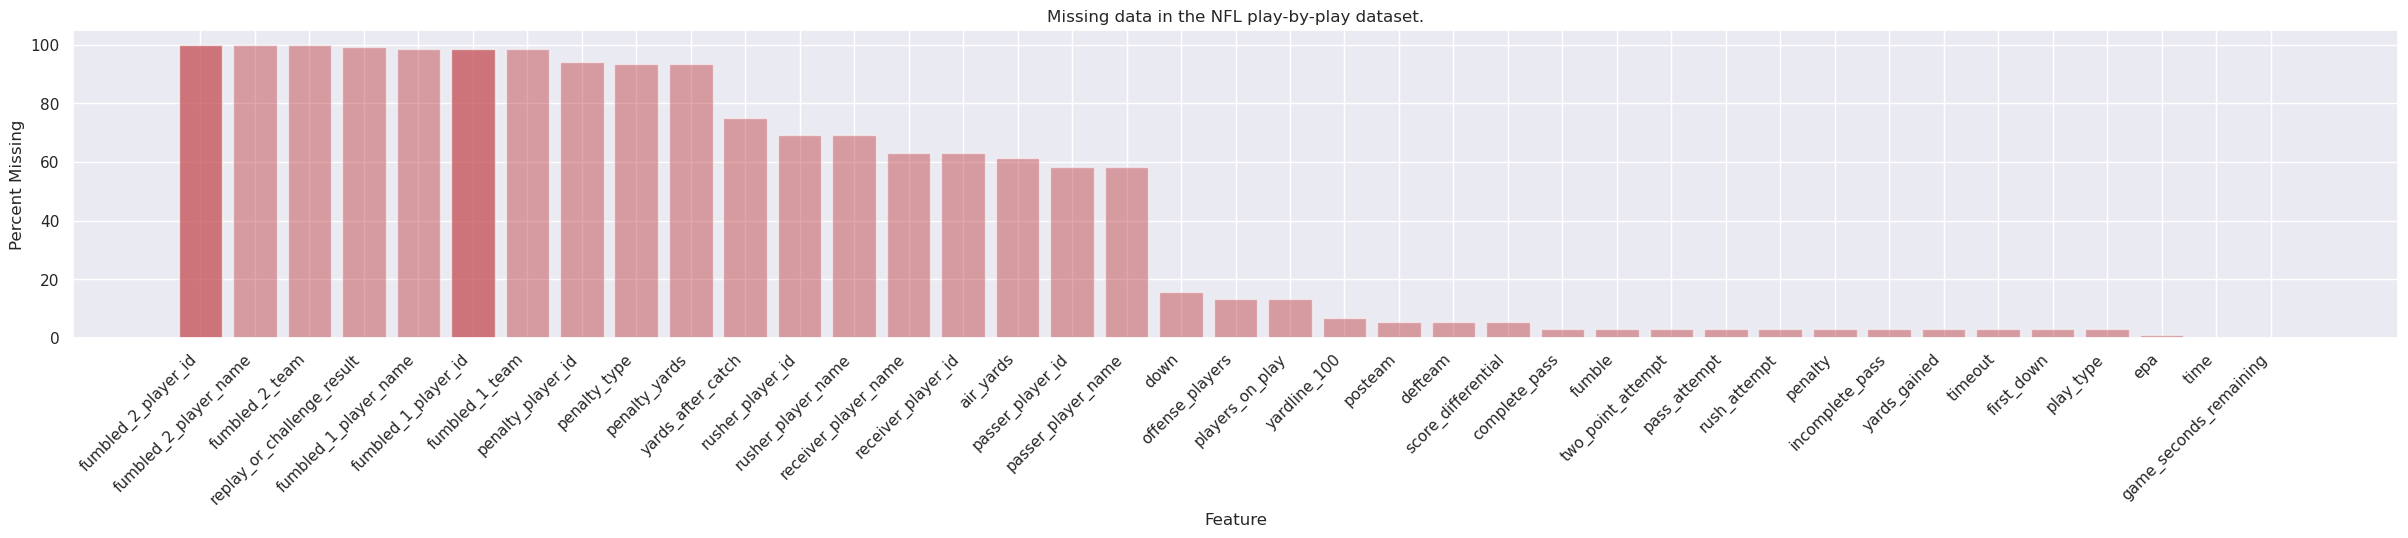

In [18]:
# do we have any missing data?
fig, ax = plt.subplots(figsize = (30,4))

nan_feats = 100*pbp_data.isna().sum()/len(pbp_data)
nan_feats_sorted = nan_feats[nan_feats > 0].sort_values(ascending=False)

ax.bar(nan_feats_sorted.index, nan_feats_sorted.values, color = 'r', alpha = 0.5)

ax.set_title("Missing data in the NFL play-by-play dataset.")
ax.set_xlabel("Feature")
ax.set_ylabel("Percent Missing")

# fix tick labels
_ = ax.set_xticks(ax.get_xticks())
_ = ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=45, ha='right')

# # Make some labels.
# rects = ax.patches
# labels = [f"{perc:.2f}%" for perc in nan_feats_sorted.values]

# for rect, label in zip(rects, labels):
#     height = rect.get_height()
#     ax.text(
#         rect.get_x() + rect.get_width() / 2, height + 2, label, ha="center", va="bottom", fontsize='x-small', rotation=90
#     )

# plt.show()


In [19]:
temp_filter = pbp_data[(~pbp_data["play_type"].isin(["kickoff", "extra_point", "field_goal", "punt"]))
        & (~pbp_data["desc"].str.contains("Punt formation"))
        & (~pbp_data["desc"].str.contains(" punts "))
        & (~pbp_data["desc"].str.contains("Kick formation"))]
print(f"""Of the {len(temp_filter):,} relevant plays in 2023 (relevance to recieving is 
any non-kicking play), {temp_filter.offense_players.isna().sum():,} ({100*temp_filter.offense_players.isna().sum()/len(temp_filter):.1f}%) are missing personnel information.""")

Of the 40,076 relevant plays in 2023 (relevance to recieving is 
any non-kicking play), 5,291 (13.2%) are missing personnel information.


In [20]:
# this could affect our snap counts. What do these plays look like?
# how many are timeouts?
num_missing_pers = temp_filter.offense_players.isna().sum()
num_to = temp_filter[(temp_filter.offense_players.isna()) & (temp_filter['timeout'] == 1)]['timeout'].sum()
print(f"Of the temp_filter {num_missing_pers:,} plays missing personnel info {num_to:,} are timeouts.")
remain = num_missing_pers - num_to
# FIXME: you can be more robust here
num_time_marker = len(temp_filter[(temp_filter.offense_players.isna()) & (temp_filter['timeout'] != 1) & (temp_filter['desc'].isin(['GAME', 
                                                                                     'END GAME', 
                                                                                     'END QUARTER 1', 
                                                                                     'END QUARTER 2', 
                                                                                     'END QUARTER 3', 
                                                                                     'END QUARTER 4']))])

print(f"Of the remaining {remain:,} plays, {num_time_marker:,} are entries that denote the beginning/end of the game or a quarter. No plays occur on these entries.")

Of the temp_filter 5,291 plays missing personnel info 270.0 are timeouts.
Of the remaining 5,021.0 plays, 185 are entries that denote the beginning/end of the game or a quarter. No plays occur on these entries.


In [21]:
# looks like our snap count info may be off. There are some plays without any personnel info
temp_filter[(temp_filter.offense_players.isna()) & (temp_filter['timeout'] != 1) & (~temp_filter['desc'].isin(['GAME', 
                                                                                     'END GAME', 
                                                                                     'END QUARTER 1', 
                                                                                     'END QUARTER 2', 
                                                                                     'END QUARTER 3', 
                                                                                     'END QUARTER 4']))].sample(5)[['desc', 'offense_players', 'timeout', 'players_on_play']]

,desc,offense_players,timeout,players_on_play
43400,(6:31) 2-T.Taylor up the middle to NYG 28 for ...,NaN,0.0,NaN
43768,(2:33) (Shotgun) 2-T.Huntley pass deep middle ...,NaN,0.0,NaN
44481,(7:25) (Shotgun) 14-S.Howell pass incomplete s...,NaN,0.0,NaN
43433,(14:24) (Shotgun) 28-J.Taylor left tackle to I...,NaN,0.0,NaN
43997,(5:40) 4-D.Carr pass short right to 83-J.Johns...,NaN,0.0,NaN


In [22]:
# TODO: justify need to engineer features

### Fumble Lost
Note that the fumble_lost variable only denotes if a fumble was lost on the play, not if the player in consideration (receiver, rusher, QB, etc.) fumbled the ball. Thus, a determination of which player lost the fumble is important for counting the number of fumbles committed by a player.

In [23]:
# let's see if we can get a fumble lost player id
def get_fumble_lost_receiver_id(x, ptype = 'rec'):
    if ptype == 'rec':
        rpid = x['receiver_player_id']
    elif ptype == 'rush':
        rpid = x['rusher_player_id']
    elif ptype == 'pass':
        rpid = x['passer_player_id']

    fpid1 = x['fumbled_1_player_id'].values[0]
    fpid2 = x['fumbled_2_player_id'].values[0]
    fteam1 = x['fumbled_1_team']
    fteam2 = x['fumbled_2_team']

    if fpid1 is None:
        fpid1 = ''
    
    if fpid2 is None:
        fpid2 = ''
    
    if fteam1 is None:
        fteam1 = ''
    
    if fteam2 is None:
        fteam2 = ''

    offense = x['posteam']
    # if there was a fumble and the receiver we are looking at was one of the fumble players
    if x['fumble_lost'] == 1 and (fpid1 == rpid or fpid2 == rpid):
        # the only time this is not a fumble for the player in consideration is when
        # there are two fumbles by the offense and the second player is not the first player.
        # e.g. player 1 fumbled and it was picked up by teammate player 2, then player 2 fumbles
        # and it is recovered by the defense
        if (fpid1 == rpid and fpid2 != rpid) and \
            (fteam1 == offense and fteam2 == offense):
            return 0
        else:
            return 1
    else:
        return 0
# now just grab fumbles for each position on each play. 
pbp_data['receiver_fumble_lost'] = pbp_data.apply(lambda x: get_fumble_lost_receiver_id(x, ptype='rec'), axis=1)
pbp_data['rusher_fumble_lost'] = pbp_data.apply(lambda x: get_fumble_lost_receiver_id(x, ptype='rush'), axis=1)
pbp_data['passer_fumble_lost'] = pbp_data.apply(lambda x: get_fumble_lost_receiver_id(x, ptype='pass'), axis=1)

### Feature Engineering

Now we can move on to engineering features. Note that there is quite a bit of data missing from the PFR, NGS, and weekly datasets. Thus, we will try to engineer as much of the data from these datasets as we can from the play-by-play data. Some things that we won't be able to engineer:

1. Cushion and Separation stats in the NGS dataset (this information isn't tracked in the play-by-play)
2. Receiving Drops, Drop Percentage, etc. (this information isn't tracked in the play-by-play)
3. Broken tackles.
4. Interceptions attributed to recievers.

Note: We may be able to engineer some of these features via some clever regex patterns or NLP techniques on the play descriptions.

In [24]:
# first we start with easy features to aggregate
# these features are able to be computed by direct aggregation 
# for reciving data we limit the pbp data to completed passes and plays that were not called dead due to officiating
agg_WR = pbp_data[(pbp_data['complete_pass'] == 1) & (pbp_data['play_type'] != 'no_play')].groupby(['receiver_player_id', 'receiver_player_name', 'game_id']).agg(
    receiving_yards = ('receiving_yards', 'sum'),
    avg_yac = ('yards_after_catch', 'mean'),
    receptions = ('complete_pass', 'count'),
    receiving_touchdowns = ('touchdown', 'sum'), 
    week = ('week', 'first')
).reset_index()

In [25]:
# now we ensure that active players who didn't get any of the above stats are still in the dataset
rosters = nfl.import_weekly_rosters(years=[year])[['week', 
                                                   'position', 
                                                   'player_name', 
                                                   'player_id',
                                                   'team', 'status']].merge(game_id_map, 
                                                                            left_on=['week', 'team'], 
                                                                            right_on = ['week', 'team_abbr']).drop('team_abbr', axis=1)
# limit the weekly rosters to only active players
# NOTE: This avoids penalizing players for being injured, if a player did not play in a game that should 
# not show up in the dataset as a bunch of zeros.
rosters = rosters[(rosters['status'] == 'ACT') & (rosters['week'] <= 18)].drop('status',axis=1)

# now loop through the active players in rosters and ensure that they appear in the dataset. 
for _, player in rosters[rosters['position'].isin(['WR', 'RB', 'FB', 'TE', 'QB'])].iterrows():
    if agg_WR[(agg_WR.receiver_player_id.isin([player.player_id])) & (agg_WR.week.isin([player.week]))].empty:
        agg_WR = pd.concat([agg_WR, pd.DataFrame([[player.player_id, None, player.game_id, 0, 0, 0, 0, player.week]], 
                                                 columns = agg_WR.columns)], 
                                            ignore_index=True)

In [26]:
# let's get the number of targets per game and number of 1st, 2nd, 3rd and 4th down targets
# group on down/player then sum up targets
targets_game = (
    pbp_data[(pbp_data["pass_attempt"] == 1) & (pbp_data["down"].isin([1, 2, 3, 4]))]
    .groupby(["receiver_player_id", "game_id", "down"])["pass_attempt"]
    .count()
    .reset_index()
    .rename({"pass_attempt": "targets"}, axis=1)
)

# now we can pivot out the targets per down into columns
targets_game = (
    targets_game.pivot(
        index=["game_id", "receiver_player_id"], columns=["down"], values="targets"
    )
    .reset_index()
    .fillna(0)
    .rename({1.0: "targets_1", 2.0: "targets_2", 3.0: "targets_3", 4.0: "targets_4"}, axis=1)
)

# finally we can get the total targets per game per player
targets_game["total_targets"] = (
    targets_game["targets_1"]
    + targets_game["targets_2"]
    + targets_game["targets_3"]
    + targets_game["targets_4"]
)


In [27]:
# let's get total available targets per game so we can later get target share
# we perform the same grouping as above except we don't group on players
team_targets_game = (
    pbp_data[(pbp_data["pass_attempt"] == 1) & (pbp_data["down"].isin([1, 2, 3, 4]))]
    .groupby(["game_id", "posteam", "down"])["pass_attempt"]
    .count()
    .reset_index()
    .rename({"pass_attempt": "targets"}, axis=1)
)

#pivot out down-level targets
team_targets_game = (
    team_targets_game.pivot(
        index=["game_id", "posteam"], columns=["down"], values="targets"
    )
    .reset_index()
    .fillna(0)
    .rename({"posteam":"team", 1.0: "ttargets_1", 2.0: "ttargets_2", 3.0: "ttargets_3", 4.0: "ttargets_4"}, axis=1)
)

# get total available targets per game
team_targets_game["ttotal_targets"] = (
    team_targets_game["ttargets_1"]
    + team_targets_game["ttargets_2"]
    + team_targets_game["ttargets_3"]
    + team_targets_game["ttargets_4"]
)


In [28]:
# now let's get air yards per player and per team (in order to get share later)
air_yards_game = (
    pbp_data[(pbp_data["pass_attempt"] == 1)]
    .groupby(["receiver_player_id", "game_id"])
    .agg(
        avg_depth_of_target = ('air_yards', 'mean'),
        air_yards = ('air_yards', 'sum'),
        max_target_depth = ('air_yards', 'max')
    )
    .reset_index()
)

# air yards per team
team_air_yards_game = (
    pbp_data[(pbp_data["pass_attempt"] == 1)]
    .groupby(["game_id", "posteam"])
    .agg(
        team_air_yards = ('air_yards', 'sum')
    )
    .reset_index()
    .rename({'posteam':'team'}, axis=1)
)



In [29]:
# redzone targets (redzone targets are not a very sticky stat but touchdowns create a large swing in points)
redzone_targets_game = (
    pbp_data[
        (pbp_data["pass_attempt"] == 1)
        & (pbp_data["yardline_100"] <= 20)
        & (pbp_data["play_type"] != "no_play")
    ]
    .groupby(["receiver_player_id", "game_id"])["pass_attempt"]
    .count()
    .reset_index()
    .rename({"pass_attempt": "rz_targets"}, axis=1)
)

In [30]:
# garbage time points
# here we want to know which points a player recieved were meaningful and which were garbage time
# this let's you know in what game-scripts players get the majority of their points

# Garbage Time Situation 1: If the score differential is greater than 28 points and there is one-quarter or less left in the game
# Garbage Time Situation 2: If the score differential is greater than 21 points and there is 10 minutes or less left in the game
# Garbage Time Situation 3: If the score differential is greater than 14 points and there is 3 minutes or less left in the game

# NOTE: these definitions are not standardized and are subject to change. 
grouped = pbp_data[
    (pbp_data["play_type"] != "no_play")
    & (
        (
            (pbp_data["complete_pass"] == 1)
            & (pbp_data["score_differential"] <= -28)
            & (pbp_data["game_seconds_remaining"] <= 15 * 60)
        )
        | (
            (pbp_data["complete_pass"] == 1)
            & (pbp_data["score_differential"] <= -21)
            & (pbp_data["game_seconds_remaining"] <= 10 * 60)
        )
        | (
            (pbp_data["complete_pass"] == 1)
            & (pbp_data["score_differential"] <= -14)
            & (pbp_data["game_seconds_remaining"] <= 3 * 60)
        )  # ((pbp_data['complete_pass'] == 1) & (pbp_data['score_differential'] < -10) & (pbp_data['game_seconds_remaining'] <= 2*60)) \
    )
].groupby(["receiver_player_id", "game_id"])


def get_gtfp(x):
    """
    computes the number of fantasy points a player received on any given play
    # NOTE: This is all done in PPR format

    Inputs:
    -------
        x (pd.Series) -> a row in the dataframe in which we are computing fantasy points
    Outputs:
    --------
        _ (pd.Series) -> a pandas series containing the fantasy points gained for that particular play/player
    """
    d = {}
    d["garbage_time_fpoints"] = (
        0.1 * x["yards_gained"] + 1 + 6 * x["touchdown"] + 2 * x["is_two_point_conversion"] - 2*x['receiver_fumble_lost']
    ).sum()
    return pd.Series(d, index=["garbage_time_fpoints"])

# now we compute fantasy points (receiving) gained on all garbage time plays per player
gtfp = grouped.apply(get_gtfp).reset_index()


In [31]:
# we can do a similar analysis to get total fantasy poitns (receiving)
grouped2 = pbp_data[
    (pbp_data["complete_pass"] == 1) & (pbp_data["play_type"] != "no_play")
].groupby(["receiver_player_id", "game_id"])


def get_fp(x):
    """
    computes the number of fantasy points a player received on any given play
    # NOTE: This is all done in PPR format

    Inputs:
    -------
        x (pd.Series) -> a row in the dataframe in which we are computing fantasy points
    Outputs:
    --------
        _ (pd.Series) -> a pandas series containing the fantasy points gained for that particular play/player
    """
    d = {}
    d["receiving_fpoints"] = (
        0.1 * x["yards_gained"]
        + 1
        + 6 * x["touchdown"]
        + 2 * x["is_two_point_conversion"]
        - 2*x['receiver_fumble_lost']
    ).sum()
    return pd.Series(d, index=["receiving_fpoints"])

# get fantasy points per player per game
rfp = grouped2.apply(get_fp).reset_index()

In [32]:
# The number of snaps is a bit more complicated. For each player, we need to count the number of times their player ID 
# appeared in the offensive snaps, then we can count the number of offensive snaps and get the percentage from that.
# snaps = nfl.import_snap_counts(years = [year]).merge(id_map, left_on='pfr_player_id', right_on = 'pfr_id')
# what I want here

# 1. Total offensive snaps (non-kickoff/kick/punt)
# 2. Total number of 1st, 2nd, 3rd, 4th downs
# 3. Total number of 1st, 2nd, 3rd, 4th downs per player

# player snaps
# we limit the types of plays in consideration to only consider "relevant" snaps. Players lining up in kick formation
# don't really have the opportunity to catch the ball (aside from trick plays)
temp_snap_db = (
    pbp_data[
        (~pbp_data["play_type"].isin(["kickoff", "extra_point", "field_goal", "punt"]))
        & (~pbp_data["desc"].str.contains("Punt formation"))
        & (~pbp_data["desc"].str.contains(" punts "))
        & (~pbp_data["desc"].str.contains("Kick formation"))
    ][["game_id", "down", "offense_players", "play_id"]]
    .dropna(subset=["down"])
    .explode("offense_players")
)

# count up the snaps
# NOTE: We left in no_play's because we want to know if receivers are lining up before timeouts/penalty calls
player_snaps = (
    temp_snap_db.groupby(["game_id", "down", "offense_players"])["play_id"]
    .count()
    .reset_index()
)

# unpivot the down groupings
player_snaps = (
    player_snaps.pivot(
        index=["game_id", "offense_players"], columns=["down"], values="play_id"
    )
    .reset_index()
    .fillna(0)
)

# just rename columns
player_snaps = player_snaps.rename(
    {
        "offense_players": "receiver_player_id",
        1.0: "snap_count_1",
        2.0: "snap_count_2",
        3.0: "snap_count_3",
        4.0: "snap_count_4",
    },
    axis=1,
)

# get total snaps for the game
player_snaps["total_relevant_snaps"] = (
    player_snaps["snap_count_1"]
    + player_snaps["snap_count_2"]
    + player_snaps["snap_count_3"]
    + player_snaps["snap_count_4"]
)


In [33]:

# now we get total offensive snaps so we can get snap percentages later
temp_team_snap_db = pbp_data[
    (~pbp_data["play_type"].isin(["kickoff", "extra_point", "field_goal", "punt"]))
    & (~pbp_data["desc"].str.contains("Punt formation"))
    & (~pbp_data["desc"].str.contains(" punts "))
    & (~pbp_data["desc"].str.contains("Kick formation"))
][["game_id", "down", "play_id", "posteam"]].dropna(subset=["down"])

# count up snaps
team_snaps = (
    temp_team_snap_db.groupby(["game_id", "down", "posteam"])["play_id"]
    .count()
    .reset_index()
)

# unpivot down groupings
team_snaps = (
    team_snaps.pivot(index=["game_id", "posteam"], columns=["down"], values="play_id")
    .reset_index()
    .fillna(0)
)

# rename columns
team_snaps = team_snaps.rename(
    {
        'posteam':'team',
        1.0: "tsnap_count_1",
        2.0: "tsnap_count_2",
        3.0: "tsnap_count_3",
        4.0: "tsnap_count_4",
    },
    axis=1,
)

# get total snaps
team_snaps["ttotal_relevant_snaps"] = (
    team_snaps["tsnap_count_1"]
    + team_snaps["tsnap_count_2"]
    + team_snaps["tsnap_count_3"]
    + team_snaps["tsnap_count_4"]
)

In [34]:
# now we will grab some simpler metrics
# FIXME: We need to see if the fumbling player was actually the receiver... group on fumbled_1_player_id?
# receiving fumbles
# rec_fumbles = pbp_data[
#     (pbp_data["complete_pass"] == 1) & (pbp_data["fumble"] == 1)
# ].groupby(["receiver_player_id", "game_id"])['fumble'].sum().reset_index().rename({'fumble':'receiving_fumbles'}, axis=1)

# # receiving fumbles lost
rec_fumbles_lost = pbp_data[
    (pbp_data['receiver_fumble_lost'] == 1)
].groupby(["receiver_player_id", "game_id"])['fumble_lost'].sum().reset_index().rename({'receiver_fumble_lost':'receiving_fumbles_lost'}, axis=1)


# number of first downs
rec_first_downs = pbp_data[
    (pbp_data["complete_pass"] == 1) & (pbp_data["first_down"] == 1)
].groupby(["receiver_player_id", "game_id"])['first_down'].count().reset_index().rename({'first_down':'receiving_first_downs'}, axis=1)

# per game epa
rec_epa = pbp_data[
    (pbp_data["pass_attempt"] == 1)
].groupby(["receiver_player_id", "game_id"])['epa'].sum().reset_index().rename({'epa':'receiving_epa'}, axis=1)

# number of 2 point conversions
rec_2ptconv = pbp_data[
    (pbp_data["complete_pass"] == 1) & (pbp_data["is_two_point_conversion"] == 1)
].groupby(["receiver_player_id", "game_id"])['is_two_point_conversion'].count().reset_index().rename({'is_two_point_conversion':'receiving_2pt_conversions'}, axis=1)

# number of intended air yards not resulting in a reception
unrealized_air_yards = pbp_data[
    (pbp_data["pass_attempt"] == 1) & (pbp_data["complete_pass"] == 0)
].groupby(["receiver_player_id", "game_id"])['air_yards'].sum().reset_index().rename({'air_yards':'unrealized_air_yards'}, axis=1)

# racr (ratio of receiving yards to air yards)
racr = pbp_data[
    (pbp_data["pass_attempt"] == 1)
].groupby(["receiver_player_id", "game_id"]).agg({'receiving_yards':'sum', 'air_yards':'sum'}).reset_index()
racr["racr"] = racr['receiving_yards']/racr['air_yards']
racr = racr.drop(['receiving_yards', 'air_yards'], axis=1)
racr = racr.dropna(subset=['racr'])


In [35]:
# merge all this together
agg_WR = agg_WR.merge(targets_game, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(redzone_targets_game, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(gtfp, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(rfp, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(air_yards_game, on=['game_id', 'receiver_player_id'], how='outer')
# agg_WR = agg_WR.merge(rec_fumbles, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(rec_fumbles_lost, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(rec_first_downs, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(rec_epa, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(rec_2ptconv, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(unrealized_air_yards, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(racr, on=['game_id', 'receiver_player_id'], how='outer')
agg_WR = agg_WR.merge(player_snaps, on=['game_id', 'receiver_player_id'], how='left').fillna(0).rename({'receiver_player_id':'player_id'},axis=1)


In [36]:
# now we will grab all the metrics from other datasets that we can't create from the pbp data
# we want to track the length of the dataset to be sure we didn't miss any players in our analysis above

# pro football reference data
print(f"Pre PFR merge: {len(agg_WR)}")
agg_WR = agg_WR.merge(
    pfr_receiving[['game_id',
        'player_id',
        'receiving_broken_tackles',
        'receiving_drop',
        'receiving_drop_pct',
        'receiving_int',
        'receiving_rat']],
    on=["game_id", "player_id"],
    how="left",
)
print(f"Post PFR merge: {len(agg_WR)}")

Pre PFR merge: 7517
Post PFR merge: 7517


In [37]:
# next gen stats data
agg_WR = agg_WR.merge(
    ngs_receiving[['game_id',
        'player_id',
        'avg_cushion',
        'avg_separation']],
    on=["game_id", "player_id"],
    how="left",
)
print(f"Post NGS merge: {len(agg_WR)}")

Post NGS merge: 7517


In [38]:
# get weekly roster data, we're going to merge on the week and player id
agg_WR.week = agg_WR.week.astype(int)
agg_WR_final = agg_WR.drop('receiver_player_name',axis=1).merge(rosters.drop('game_id', axis=1), on=['week', 'player_id'], how="left")

# we also grab meta info on players here
agg_WR_final = agg_WR_final.merge(id_map[['gsis_id', 'birthdate', 'age',
                                        'draft_year', 'draft_round', 'draft_pick', 'draft_ovr',
                                        'twitter_username', 'height', 'weight', 'college']].rename({'gsis_id':"player_id"},axis=1),
                                            on = "player_id", how="left")

In [39]:
# let's get snap percentages
temp = agg_WR_final.merge(team_snaps, on=['game_id', 'team'], how='left').copy()
temp['snap_percentage_1'] = temp['snap_count_1']/temp["tsnap_count_1"]
temp['snap_percentage_2'] = temp['snap_count_2']/temp["tsnap_count_2"]
temp['snap_percentage_3'] = temp['snap_count_3']/temp["tsnap_count_3"]
temp['snap_percentage_4'] = temp['snap_count_4']/temp["tsnap_count_4"]
temp['snap_percentage'] = temp['total_relevant_snaps']/temp["ttotal_relevant_snaps"]

In [40]:
# now lets get target share
temp = temp.merge(team_targets_game, on=['game_id', 'team'], how='left').copy()
temp['target_share_1'] = temp['targets_1']/temp["ttargets_1"]
temp['target_share_2'] = temp['targets_2']/temp["ttargets_2"]
temp['target_share_3'] = temp['targets_3']/temp["ttargets_3"]
temp['target_share_4'] = temp['targets_4']/temp["ttargets_4"]
temp['target_share'] = temp['total_targets']/temp["ttotal_targets"]

In [41]:
# we can also grab air yard share (ratio of air yards to a particular receiver to the entire team)
temp = temp.merge(team_air_yards_game, on=['game_id', 'team'], how='left').copy()
temp['air_yards_share'] = temp['air_yards']/temp["team_air_yards"]

In [42]:
# get rid of unnecessary columns
agg_WR_final = temp.drop(
    [
        "tsnap_count_1",
        "tsnap_count_2",
        "tsnap_count_3",
        "tsnap_count_4",
        "ttotal_relevant_snaps",
        "ttargets_1",
        "ttargets_2",
        "ttargets_3",
        "ttargets_4",
        "ttotal_targets",
        'team_air_yards'
    ],
    axis=1,
)
# we also can grab the depth for each player each week
agg_WR_final = agg_WR_final.merge(
    depth_charts[depth_charts['formation'] == 'Offense'][["game_id", "gsis_id", "depth_team"]],
    left_on=["game_id", "player_id"],
    right_on=["game_id", "gsis_id"],
    how="left",
).drop("gsis_id", axis=1)
# computing wopr: 1.5*target_share + 0.7*air_yards_share
agg_WR_final['wopr'] = 1.5*agg_WR_final['target_share'] + 0.7*agg_WR_final['air_yards_share']
agg_WR_final.head()

,player_id,game_id,receiving_yards,avg_yac,receptions,receiving_touchdowns,week,targets_1,targets_2,targets_3,...,snap_percentage_4,snap_percentage,target_share_1,target_share_2,target_share_3,target_share_4,target_share,air_yards_share,depth_team,wopr
0,00-0024243,2023_04_DEN_CHI,8.0,11.0,1.0,0.0,4,1.0,0.0,0.0,...,0.0,0.276316,0.062500,0.0,0.000000,0.0,0.025641,-0.009677,3,0.031687
1,00-0024243,2023_07_LV_CHI,16.0,11.0,1.0,0.0,7,1.0,0.0,0.0,...,0.0,0.324324,0.083333,0.0,0.000000,0.0,0.032258,0.094340,3,0.114425
2,00-0024243,2023_14_DET_CHI,4.0,7.0,1.0,0.0,14,1.0,0.0,0.0,...,0.0,0.242857,0.100000,0.0,0.000000,0.0,0.027778,-0.012295,3,0.033060
3,00-0024243,2023_16_ARI_CHI,1.0,0.0,1.0,1.0,16,0.0,0.0,1.0,...,NaN,0.000000,0.000000,0.0,0.125000,NaN,0.035714,0.003546,3,0.056054
4,00-0027696,2023_03_NO_GB,8.0,0.0,1.0,1.0,3,0.0,0.0,1.0,...,0.5,0.269841,0.000000,0.0,0.076923,NaN,0.026316,0.029091,1,0.059837


In [43]:
# finally, let's grab some associated stats
# 1) Associated rbR
# 2) Avg. Defensive fantasy points allowed to position.
# 3. Is new quarterback?
# 4. num Injured Defensive starters?

In [44]:
# Associated QBR is the QBR of the QB that the receiver played with for that game.
# NOTE: When there are multiple QB's for a single game, we take whichever QB played the most.

# first we calculate QBR's for all QB's per game
def get_QBR(x):
    """
    Takes an entry for a specific quarterback and calculates it's QBR via
    QBR = 0.05*(completion_percentage - 30) + 0.25*(yards_per_attempt - 3) + 0.2*td_percentage + 2.375 - 0.25*interception_percentage
    NOTE: This is the NFL's classic QBR, ESPN has not released the formula for their "more accurate" QBR
    """
    d = {}
    terms = []
    terms.append(5 * (x["completion_percentage"] - 0.3))
    terms.append(0.25*(x['yards_per_attempt'] - 3))
    terms.append(20*x["td_percentage"])
    terms.append(2.375 - 25 * x["interception_percentage"])
    
    terms = [0 if (x < 0) else 2.375 if x > 2.375 else x for x in terms]


    d["QBR"] = 100*sum(terms)/6
    return pd.Series(d, index=["QBR"])

# now we just group by QB and game to get the QBR for that game
qbr_group = pbp_data[
    (pbp_data["play_type"] == "pass")
].groupby(["passer_player_id", "game_id", "posteam"])

qb_num_snaps = pbp_data.groupby(["passer_player_id", "game_id", "posteam"])['down'].count().reset_index().rename({'down':'qb_num_snaps'},axis=1)

qbr = qbr_group.agg(
    completions = ('complete_pass', 'sum'),
    attempts = ('complete_pass', 'count'),
    passing_yards = ('passing_yards', 'sum'),
    touchdowns = ('touchdown', 'sum'),
    interceptions = ('interception', 'sum'),
).reset_index()

qbr["completion_percentage"] = qbr['completions']/qbr['attempts']
qbr['yards_per_attempt'] = qbr['passing_yards']/qbr['attempts']
qbr["td_percentage"] = qbr['touchdowns']/qbr['attempts']
qbr["interception_percentage"] = qbr['interceptions']/qbr['attempts']
# get QBR per QB per game
qbr["QBR"] = qbr.apply(get_QBR, axis=1)
qbr = qbr.merge(qb_num_snaps, on=["passer_player_id", "game_id", "posteam"])

In [45]:
qbr.head()

,passer_player_id,game_id,posteam,completions,attempts,passing_yards,touchdowns,interceptions,completion_percentage,yards_per_attempt,td_percentage,interception_percentage,QBR,qb_num_snaps
0,00-0023459,2023_01_BUF_NYJ,NYJ,0.0,2,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,39.583333,2
1,00-0026158,2023_13_CLE_LA,CLE,23.0,46,254.0,2.0,1.0,0.500000,5.521739,0.043478,0.021739,72.192029,46
2,00-0026158,2023_14_JAX_CLE,CLE,26.0,46,311.0,3.0,1.0,0.565217,6.760870,0.065217,0.021739,90.036232,46
3,00-0026158,2023_15_CHI_CLE,CLE,28.0,48,374.0,3.0,3.0,0.583333,7.791667,0.062500,0.062500,77.951389,48
4,00-0026158,2023_16_CLE_HOU,CLE,27.0,43,368.0,3.0,2.0,0.627907,8.558140,0.069767,0.046512,93.943798,42


In [58]:
# eventually what I want, when I create my time series, is the average QB rating for the QB that is starting the game we want to predict.
# So this dataset should be kept separate, and calculated come model time.

# let's now get fantasy points given up to various positions per team
# first we need to know what position each passer, receiver and rusher plays
print(len(pbp_data))

pbp_data['passer_player_position'] = pbp_data.merge(rosters[['player_id', 'position', 'week']], 
                                                    left_on=['week', 'passer_player_id'], 
                                                    right_on = ['week', 'player_id'], 
                                                    how='left')['position']

pbp_data['rusher_player_position'] = pbp_data.merge(rosters[['player_id', 'position', 'week']], 
                                                    left_on=['week', 'rusher_player_id'], 
                                                    right_on = ['week', 'player_id'], 
                                                    how='left')['position']

pbp_data['receiver_player_position'] = pbp_data.merge(rosters[['player_id', 'position', 'week']], 
                                                    left_on=['week', 'receiver_player_id'], 
                                                    right_on = ['week', 'player_id'], 
                                                    how='left')['position']

print(len(pbp_data))

# first we can look at plays where the passer was a QB or the rusher was a QB.
# NOTE: These are mutually exclusive. If the passer is a QB, then there should be no rushing stats 
# for that play. We cannot say the same for receiving. There are plays where a QB receives the ball,
# but in order to not count WR points toward QB's on 'normal' plays, we need to treat that separately.
# NOTE: To be safe we should treat them all separately? Are there ever plays where there is a pass but also an RB rush? 
# maybe in a fumble recovery situation?

def fpoints(x, possession_type, point_string):
    """
    computed using 4 pt qb league
    """
    d = {}
    if possession_type == 'pass':
        # do I need to include sacks?
        d[point_string] = (x['passing_yards']/25
            + x['pass_touchdown']*4
            + 2*x['is_two_point_conversion']
            - 2*x['interception']
            - 2*x['passer_fumble_lost']).sum()
    elif possession_type == 'rush':
        d[point_string] = (x['rushing_yards']/10
            + x['touchdown']*6
            + 2*x['is_two_point_conversion']
            - 2*x['rusher_fumble_lost']).sum()
    elif possession_type == 'rec':
        d[point_string] = (x['receiving_yards']/10
            + 1*x['complete_pass']
            + x['touchdown']*6
            + 2*x['is_two_point_conversion']
            - 2*x['receiver_fumble_lost']).sum()
    else:
        print(f'{possession_type} is not a valid position type')
        raise ValueError 
        
    return pd.Series(d, index=[point_string])


qb_grouping_pass = pbp_data[(pbp_data['passer_player_position'] == 'QB')].groupby(["game_id", "defteam"])
temp_qb_fpoints = qb_grouping_pass.apply(lambda x: fpoints(x, point_string = "qb_pass_fpoints", possession_type = 'pass')).reset_index()

qb_grouping_rush = pbp_data[(pbp_data['rusher_player_position'] == 'QB')].groupby(["game_id", "defteam"])
temp_qb_fpoints_2 = qb_grouping_rush.apply(lambda x: fpoints(x, point_string = "qb_rush_fpoints", possession_type = 'rush')).reset_index()

qb_grouping_rec = pbp_data[(pbp_data['receiver_player_position'] == 'QB')].groupby(["game_id", "defteam"])
temp_qb_fpoints_3 = qb_grouping_rec.apply(lambda x: fpoints(x, point_string = "qb_rec_fpoints", possession_type = 'rec')).reset_index()


# now we put that all together to get the fantasy points given up by each defense each week.
temp_qb_fpoints = temp_qb_fpoints.merge(temp_qb_fpoints_2, on=['game_id', 'defteam'], how='outer')
temp_qb_fpoints = temp_qb_fpoints.merge(temp_qb_fpoints_3, on=['game_id', 'defteam'], how='outer')
temp_qb_fpoints['position_group'] = 'QB'
temp_qb_fpoints['qb_rec_fpoints'] = temp_qb_fpoints['qb_rec_fpoints'].fillna(0)
temp_qb_fpoints['qb_rush_fpoints'] = temp_qb_fpoints['qb_rush_fpoints'].fillna(0)
temp_qb_fpoints['qb_pass_fpoints'] = temp_qb_fpoints['qb_pass_fpoints'].fillna(0)
temp_qb_fpoints['total_qb_fpoints_given_up'] = temp_qb_fpoints['qb_rec_fpoints'] + temp_qb_fpoints['qb_rush_fpoints'] + temp_qb_fpoints['qb_pass_fpoints']
temp_qb_fpoints

47399
47399


,game_id,defteam,qb_pass_fpoints,qb_rush_fpoints,qb_rec_fpoints,position_group,total_qb_fpoints_given_up
0,2023_01_ARI_WAS,ARI,8.08,7.1,0.0,QB,15.18
1,2023_01_ARI_WAS,WAS,3.28,-2.3,0.0,QB,0.98
2,2023_01_BUF_NYJ,BUF,7.60,0.6,0.0,QB,8.20
3,2023_01_BUF_NYJ,NYJ,7.44,1.6,0.0,QB,9.04
4,2023_01_CAR_ATL,ATL,5.84,1.7,0.0,QB,7.54
...,...,...,...,...,...,...,...
539,2023_18_PIT_BAL,PIT,9.84,4.0,0.0,QB,13.84
540,2023_18_SEA_ARI,ARI,17.56,2.8,0.0,QB,20.36
541,2023_18_SEA_ARI,SEA,14.48,3.4,0.0,QB,17.88
542,2023_18_TB_CAR,CAR,5.48,0.7,0.0,QB,6.18


In [59]:
rb_grouping_pass = pbp_data[(pbp_data['passer_player_position'] == 'RB')].groupby(["game_id", "defteam"])
temp_rb_fpoints = rb_grouping_pass.apply(lambda x: fpoints(x, point_string = "rb_pass_fpoints", possession_type = 'pass')).reset_index()

rb_grouping_rush = pbp_data[(pbp_data['rusher_player_position'] == 'RB')].groupby(["game_id", "defteam"])
temp_rb_fpoints_2 = rb_grouping_rush.apply(lambda x: fpoints(x, point_string = "rb_rush_fpoints", possession_type = 'rush')).reset_index()
rb_grouping_rec = pbp_data[(pbp_data['receiver_player_position'] == 'RB')].groupby(["game_id", "defteam"])
temp_rb_fpoints_3 = rb_grouping_rec.apply(lambda x: fpoints(x, point_string = "rb_rec_fpoints", possession_type = 'rec')).reset_index()


# now we put that all together to get the fantasy points given up by each defense each week.
temp_rb_fpoints = temp_rb_fpoints.merge(temp_rb_fpoints_2, on=['game_id', 'defteam'], how='outer')
temp_rb_fpoints = temp_rb_fpoints.merge(temp_rb_fpoints_3, on=['game_id', 'defteam'], how='outer')
temp_rb_fpoints['position_group'] = 'RB'
temp_rb_fpoints['rb_rec_fpoints'] = temp_rb_fpoints['rb_rec_fpoints'].fillna(0)
temp_rb_fpoints['rb_rush_fpoints'] = temp_rb_fpoints['rb_rush_fpoints'].fillna(0)
temp_rb_fpoints['rb_pass_fpoints'] = temp_rb_fpoints['rb_pass_fpoints'].fillna(0)
temp_rb_fpoints['total_rb_fpoints_given_up'] = temp_rb_fpoints['rb_rec_fpoints'] + temp_rb_fpoints['rb_rush_fpoints'] + temp_rb_fpoints['rb_pass_fpoints']
temp_rb_fpoints

,game_id,defteam,rb_pass_fpoints,rb_rush_fpoints,rb_rec_fpoints,position_group,total_rb_fpoints_given_up
0,2023_04_CIN_TEN,CIN,4.08,22.2,6.9,RB,33.18
1,2023_04_PIT_HOU,PIT,4.24,11.0,5.8,RB,21.04
2,2023_05_GB_LV,GB,0.00,13.3,9.1,RB,22.40
3,2023_05_TEN_IND,IND,0.00,13.7,12.4,RB,26.10
4,2023_09_MIN_ATL,ATL,0.00,6.9,17.2,RB,24.10
...,...,...,...,...,...,...,...
539,2023_18_PIT_BAL,PIT,0.00,2.6,5.6,RB,8.20
540,2023_18_SEA_ARI,ARI,0.00,11.0,6.1,RB,17.10
541,2023_18_SEA_ARI,SEA,0.00,22.7,10.6,RB,33.30
542,2023_18_TB_CAR,CAR,0.00,10.2,6.5,RB,16.70


In [60]:
wr_grouping_pass = pbp_data[(pbp_data['passer_player_position'] == 'WR')].groupby(["game_id", "defteam"])
temp_wr_fpoints = wr_grouping_pass.apply(lambda x: fpoints(x, point_string = "wr_pass_fpoints", possession_type = 'pass')).reset_index()

wr_grouping_rush = pbp_data[(pbp_data['rusher_player_position'] == 'WR')].groupby(["game_id", "defteam"])
temp_wr_fpoints_2 = wr_grouping_rush.apply(lambda x: fpoints(x, point_string = "wr_rush_fpoints", possession_type = 'rush')).reset_index()

wr_grouping_rec = pbp_data[(pbp_data['receiver_player_position'] == 'WR')].groupby(["game_id", "defteam"])
temp_wr_fpoints_3 = wr_grouping_rec.apply(lambda x: fpoints(x, point_string = "wr_rec_fpoints", possession_type = 'rec')).reset_index()


# now we put that all together to get the fantasy points given up by each defense each week.
temp_wr_fpoints = temp_wr_fpoints.merge(temp_wr_fpoints_2, on=['game_id', 'defteam'], how='outer')
temp_wr_fpoints = temp_wr_fpoints.merge(temp_wr_fpoints_3, on=['game_id', 'defteam'], how='outer')
temp_wr_fpoints['position_group'] = 'WR'
temp_wr_fpoints['wr_rec_fpoints'] = temp_wr_fpoints['wr_rec_fpoints'].fillna(0)
temp_wr_fpoints['wr_rush_fpoints'] = temp_wr_fpoints['wr_rush_fpoints'].fillna(0)
temp_wr_fpoints['wr_pass_fpoints'] = temp_wr_fpoints['wr_pass_fpoints'].fillna(0)
temp_wr_fpoints['total_wr_fpoints_given_up'] = temp_wr_fpoints['wr_rec_fpoints'] + temp_wr_fpoints['wr_rush_fpoints'] + temp_wr_fpoints['wr_pass_fpoints']
temp_wr_fpoints

,game_id,defteam,wr_pass_fpoints,wr_rush_fpoints,wr_rec_fpoints,position_group,total_wr_fpoints_given_up
0,2023_02_KC_JAX,KC,-0.04,0.0,28.700000,WR,28.660000
1,2023_03_LAC_MIN,MIN,5.96,0.0,83.500000,WR,89.460000
2,2023_04_SEA_NYG,SEA,0.00,0.7,33.800000,WR,34.500000
3,2023_04_TB_NO,NO,0.00,1.1,50.799999,WR,51.899999
4,2023_05_HOU_ATL,HOU,0.88,0.0,23.800000,WR,24.680000
...,...,...,...,...,...,...,...
539,2023_18_NYJ_NE,NE,0.00,0.0,8.200000,WR,8.200000
540,2023_18_PHI_NYG,NYG,0.00,0.0,37.000000,WR,37.000000
541,2023_18_PIT_BAL,PIT,0.00,0.0,13.600000,WR,13.600000
542,2023_18_SEA_ARI,ARI,0.00,0.0,25.399999,WR,25.399999


In [61]:
te_grouping_pass = pbp_data[(pbp_data['passer_player_position'] == 'TE')].groupby(["game_id", "defteam"])
temp_te_fpoints = te_grouping_pass.apply(lambda x: fpoints(x, point_string = "te_pass_fpoints", possession_type = 'pass')).reset_index()

te_grouping_rush = pbp_data[(pbp_data['rusher_player_position'] == 'TE')].groupby(["game_id", "defteam"])
temp_te_fpoints_2 = te_grouping_rush.apply(lambda x: fpoints(x, point_string = "te_rush_fpoints", possession_type = 'rush')).reset_index()

te_grouping_rec = pbp_data[(pbp_data['receiver_player_position'] == 'TE')].groupby(["game_id", "defteam"])
temp_te_fpoints_3 = te_grouping_rec.apply(lambda x: fpoints(x, point_string = "te_rec_fpoints", possession_type = 'rec')).reset_index()


# now we put that all together to get the fantasy points given up by each defense each week.
temp_te_fpoints = temp_te_fpoints.merge(temp_te_fpoints_2, on=['game_id', 'defteam'], how='outer')
temp_te_fpoints = temp_te_fpoints.merge(temp_te_fpoints_3, on=['game_id', 'defteam'], how='outer')
temp_te_fpoints['position_group'] = 'TE'
temp_te_fpoints['te_rec_fpoints'] = temp_te_fpoints['te_rec_fpoints'].fillna(0)
temp_te_fpoints['te_rush_fpoints'] = temp_te_fpoints['te_rush_fpoints'].fillna(0)
temp_te_fpoints['te_pass_fpoints'] = temp_te_fpoints['te_pass_fpoints'].fillna(0)
temp_te_fpoints['total_te_fpoints_given_up'] = temp_te_fpoints['te_rec_fpoints'] + temp_te_fpoints['te_rush_fpoints'] + temp_te_fpoints['te_pass_fpoints']
temp_te_fpoints

,game_id,defteam,te_pass_fpoints,te_rush_fpoints,te_rec_fpoints,position_group,total_te_fpoints_given_up
0,2023_08_ATL_TEN,TEN,0.0,0.0,10.1,TE,10.1
1,2023_09_NYG_LV,LV,0.0,0.0,7.3,TE,7.3
2,2023_14_NE_PIT,NE,0.0,0.0,12.5,TE,12.5
3,2023_15_MIN_CIN,MIN,0.0,0.0,17.7,TE,17.7
4,2023_01_GB_CHI,GB,0.0,0.0,9.4,TE,9.4
...,...,...,...,...,...,...,...
533,2023_18_PIT_BAL,PIT,0.0,0.0,16.4,TE,16.4
534,2023_18_SEA_ARI,ARI,0.0,0.0,17.4,TE,17.4
535,2023_18_SEA_ARI,SEA,0.0,0.0,17.6,TE,17.6
536,2023_18_TB_CAR,CAR,0.0,0.0,5.0,TE,5.0


In [62]:
fpoints_given_up = temp_qb_fpoints[['game_id', 'defteam', 'total_qb_fpoints_given_up']].merge(temp_rb_fpoints[['game_id', 'defteam', 'total_rb_fpoints_given_up']], on=['game_id', 'defteam'], how='outer')
fpoints_given_up = fpoints_given_up.merge(temp_wr_fpoints[['game_id', 'defteam', 'total_wr_fpoints_given_up']], on=['game_id', 'defteam'], how='outer')
fpoints_given_up = fpoints_given_up.merge(temp_te_fpoints[['game_id', 'defteam', 'total_te_fpoints_given_up']], on=['game_id', 'defteam'], how='outer')
fpoints_given_up.head()

,game_id,defteam,total_qb_fpoints_given_up,total_rb_fpoints_given_up,total_wr_fpoints_given_up,total_te_fpoints_given_up
0,2023_01_ARI_WAS,ARI,15.18,15.2,25.100000,11.0
1,2023_01_ARI_WAS,WAS,0.98,11.6,20.100000,12.4
2,2023_01_BUF_NYJ,BUF,8.20,28.4,21.000001,1.2
3,2023_01_BUF_NYJ,NYJ,9.04,16.9,35.700000,12.1
4,2023_01_CAR_ATL,ATL,7.54,20.7,15.300000,16.3


In [63]:
# josh dobbs f points in ARI WAS week 1 game:
print(f"Josh Dobbs scored {132/25 - 3/10 - 2*2:,.2f} fantasy points in week 1 against Washington.")
print(f"Sam Howell scored {202/25 + 4 -2 + 11/10 + 6 - 2} fantasy points in week 1 against Arizona.")

Josh Dobbs scored 0.98 fantasy points in week 1 against Washington.
Sam Howell scored 15.18 fantasy points in week 1 against Arizona.


In [79]:
temp_qb_fpoints.groupby(['defteam'])['total_qb_fpoints_given_up'].mean().reset_index().sort_values(by='total_qb_fpoints_given_up', ascending=False)

,defteam,total_qb_fpoints_given_up
31,WAS,20.722353
25,PHI,20.578824
10,DET,19.404706
16,LA,18.882353
0,ARI,18.850588
14,JAX,18.516471
17,LAC,18.454118
1,ATL,18.128235
29,TB,17.930588
19,MIA,17.258824


In [76]:
agg_WR_final.groupby(['player_id', 'player_name', 'team'])['receiving_yards'].sum().reset_index().sort_values('receiving_yards', ascending = False).iloc[:20]

,player_id,player_name,team,receiving_yards
99,00-0033040,Tyreek Hill,MIA,1799.0
372,00-0036358,CeeDee Lamb,DAL,1749.0
454,00-0036963,Amon-Ra St. Brown,DET,1515.0
671,00-0039075,Puka Nacua,LA,1486.0
296,00-0035676,A.J. Brown,PHI,1456.0
214,00-0034827,D.J. Moore,CHI,1364.0
351,00-0036261,Brandon Aiyuk,SF,1342.0
404,00-0036554,Nico Collins,HOU,1297.0
46,00-0031408,Mike Evans,TB,1255.0
50,00-0031544,Amari Cooper,CLE,1250.0


In [77]:
agg_WR_final.groupby(['player_id', 'player_name', 'team'])['receiving_touchdowns'].sum().reset_index().sort_values('receiving_touchdowns', ascending = False).iloc[:20]

,player_id,player_name,team,receiving_touchdowns
99,00-0033040,Tyreek Hill,MIA,14.0
46,00-0031408,Mike Evans,TB,13.0
656,00-0038994,Jordan Addison,MIN,13.0
372,00-0036358,CeeDee Lamb,DAL,12.0
667,00-0039065,Sam LaPorta,DET,10.0
182,00-0034348,Courtland Sutton,DEN,10.0
454,00-0036963,Amon-Ra St. Brown,DET,10.0
287,00-0035640,DK Metcalf,SEA,8.0
214,00-0034827,D.J. Moore,CHI,8.0
37,00-0031236,Brandin Cooks,DAL,8.0
